# MANUAL DE LABORATORIO DE COMUNICACIONES DIGITALES: PYTHON
F. Javier Payán Somet, Juan José Murillo-Fuentes, José Carlos Aradillas Jaramillo \
_Departamento de Teoría de la Señal y Comunicaciones_ \
_Escuela Técnica Superior de Ingeniería_ \
_Universidad de Sevilla_ 

# Tema 2. Variable Aleatoria

**Este notebook contiene código del Tema 2**

## Inicialización

In [1]:
# Python ≥3.7 is required
import sys
assert sys.version_info >= (3, 7)

# Numpy ≥1.16 is required
import numpy as np
assert np.__version__ >= "1.16"

# Common imports
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
DIRECTORIO_RAIZ_PROYECTO = "."
CAPITULO_ID = "variableAleatoria"
PATH_IMAGES = os.path.join(DIRECTORIO_RAIZ_PROYECTO, "images", CAPITULO_ID)
os.makedirs(PATH_IMAGES, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolucion=300):
    path = os.path.join(PATH_IMAGES, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolucion)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore") #Ignorar warnings

## Probabilidad y variables aleatorias

### Estimación de la función masa de probabilidad de una variable aleatoria discreta

In [2]:
np.random.randint(6,size=10)+1

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5])

**Código 2.1**

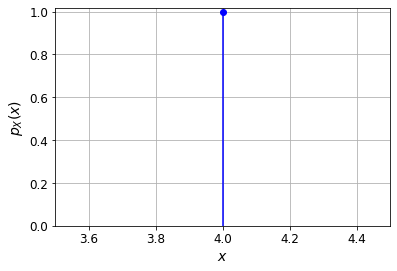

In [3]:
Np = 1**6 #Número de muestras a generar
X = np.random.randint(6, size=Np) + 1
xi, px = np.unique(X, return_counts=True)   
#Devuelve los valores distintos encontrados en X y sus frecuencias
px = px/Np   #Estimaciones de las probabilidades

plt.figure(0)
plt.stem(xi,px,'b-','bo','b-',use_line_collection=True)
plt.axis([xi[0]-.5,xi[-1]+0.5, 0, max(px)+0.015])
plt.xlabel('$x$'), plt.ylabel('$p_X(x)$'), plt.grid(True)
plt.show()

**Código 2.2. Función masa de probabilidad estimada.**

In [4]:
def LCDfmp(X):    
    ''' 
     px,x = LCDfmp(X)
    Estima la función de masa de probabilidad a partir de muestras de una
    variable aleatoria discreta, en X.
    Devuelve los valores de la fmp y los puntos en los que se evalua (soporte)
    '''
    Np = np.size(X)    
    x, px = np.unique(X, return_counts=True)   
    px = px/Np
    return(px,x)  

**Código 2.3**

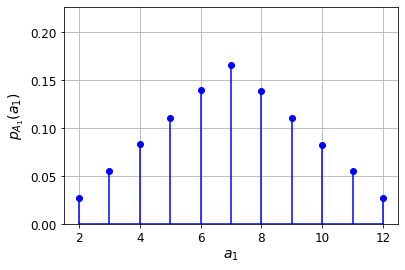

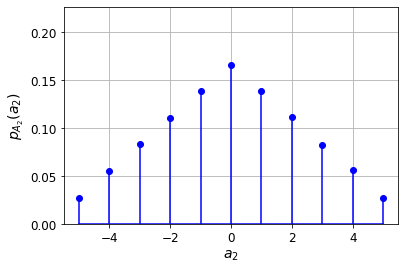

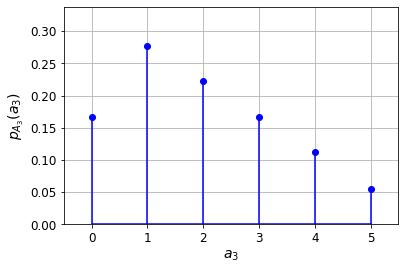

In [5]:
from labcomdig import LCDfmp

# Definamos las variables aleatorias y obtengamos sus muestras
Np = 1e6 # Número de muestras a generar
X1 = np.random.randint(6, size=int(Np)) + 1
X2 = np.random.randint(6, size=int(Np)) + 1
A1 = X1 + X2
A2 = X1 - X2
A3 = np.abs(X1 - X2)

# Obtengamos 
Pa1,a1 = LCDfmp(A1)
Pa2,a2 = LCDfmp(A2)
Pa3,a3 = LCDfmp(A3)
# Representemos su fmp
plt.figure(1)
plt.stem(a1,Pa1,'b-','bo','b-',use_line_collection=True)
plt.axis([a1[0]-.5,a1[-1]+0.5, 0, max(Pa1)+0.06])
plt.xlabel('$a_1$'), plt.ylabel('$p_{A_1}(a_1)$'), plt.grid(True)
plt.show()


plt.figure(2)
plt.stem(a2,Pa2,'b-','bo','b-',use_line_collection=True)
plt.axis([a2[0]-.5,a2[-1]+0.5, 0, max(Pa2)+0.06])
plt.xlabel('$a_2$'), plt.ylabel('$p_{A_2}(a_2)$'), plt.grid(True)
plt.show()


plt.figure(3)
plt.stem(a3,Pa3,'b-','bo','b-',use_line_collection=True)
plt.axis([a3[0]-.5,a3[-1]+0.5, 0, max(Pa3)+0.06])
plt.xlabel('$a_3$'), plt.ylabel('$p_{A_3}(a_3)$'), plt.grid(True)
plt.show()

**Código 2.4.  Generación de una variable aleatoria discreta y representación de su función masa de probabilidad.**

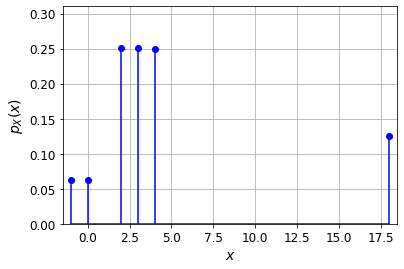

Saving figure codigo24


<Figure size 432x288 with 0 Axes>

In [6]:
from labcomdig import LCDfmp

Np = 1e6 # Número de muestras a generar
X = np.random.randint(16,size=int(Np))+1
X[np.where((X==3)+(X==4))] = 3
X[np.where((X==5)+(X==6)+(X==7)+(X==8))] = 4
X[np.where((X==9)+(X==10)+(X==11)+(X==12))] = 5
X[np.where((X==13)+(X==14)+(X==15)+(X==16))] = 6
X[np.where((X==3))] = 20
X=X-2
px,xi = LCDfmp(X)
plt.figure(4)
plt.stem(xi, px,'b-','bo','b-',use_line_collection=True)
plt.axis([xi[0]-0.5,xi[-1]+0.5, 0, max(px)+0.06])
plt.xlabel('$x$'), plt.ylabel('$p_X(x)$'), plt.grid(True)
plt.show()
save_fig('codigo24')

### Función densidad de probabilidad en el caso continuo

**Código 2.5 Estimación de la función densidad de probabilidad uniforme**

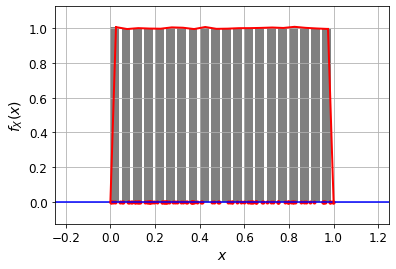

Saving figure codigo25
El valor de la integral en todo x, para la fdp uniforme es: 0.9999999999999999


<Figure size 432x288 with 0 Axes>

In [7]:
Np = 10**6  # Número de muestras a generar
Nbins = 20 # Número de intervalos en los que se dividirá el histograma
Xu = np.random.rand(Np) # Muestras de va uniformemente distribuida entre 0 y 1

plt.figure(5)
# Se representa un subconjunto de las muestras, las 100 primeras, en el eje x.
plt.plot(Xu[:100], np.zeros(100),'.r') #se utiliza marcador '.', en rojo

# Se fijan los lí­mites de representación
plt.axis([-0.25, 1.25, -0.125, 1.125]) 
plt.plot(np.array([-0.5, 1.5]),np.array([0, 0]),'b')
# Se estima la fpd, usando la función histograma
[fx,xedge] = np.histogram(Xu,Nbins);   #Calcula el histograma:  Nbins es el número de contenedores en los que se divide el intervalo entre el valor mínimo y máximo de Xu.

# La función devuelve en xedge las coordenadas iniciales y finales de cada uno de los contenedores: en total Nbins+1 valores. En la i-ésima entrada de fx devuelve el número de veces que la va toma un valor perteneciente al i-ésimo intervalo.
# El número de muestras en cada intervalo divido por el número total de muestras generadas de la va es la frecuencia relativa de cada intervalo. Para obtener la estimación de la fdp hay que dividir por el ancho del intervalo. 
fx = fx/Np/(xedge[1]-xedge[0])

# Se representa la estimación de fx mediante un diagrama de barras.
plt.bar(xedge[:-1],fx,width=((xedge[1]-xedge[0])*0.8),align='edge',color='grey')  

# Obtengamos las coordenadas de los centros de cada intervalo: en total Nbins coordenadas
x=(xedge[:-1]+xedge[1:])/2

# Representemos la función con dos puntos adicionales para señalar la subida y bajada de la misma
plt.plot(x,fx,'r',linewidth=2)
plt.plot([0,x[0]],[0,fx[0]],'r',linewidth=2)
plt.plot([x[-1],1],[fx[-1],0],'r',linewidth=2)
plt.xlabel('$x$'), plt.ylabel('$f_X(x)$'), plt.grid(True)
plt.show()
save_fig('codigo25')

print('El valor de la integral en todo x, para la fdp uniforme es:',sum(fx*(xedge[1:]-xedge[:-1])))

**Código 2.6 Estimación de la función densidad de probabilidad uniforme**

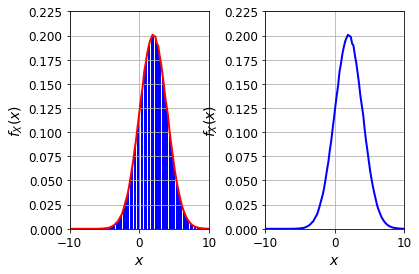

Saving figure codigo26
El valor de la integral en todo x, para la fdp gaussiana es: 1.0


<Figure size 432x288 with 0 Axes>

In [8]:
Np = 10**6 # Número de muestras generadas
m =2        # Media de la va
var = 4     # Varianza de la va
Xg = np.sqrt(var)*np.random.randn(Np)+m # Se generan Np posibles valores una variable 
      #aleatoria gaussiana de media m y varianza var

# Establezcamos la anchura de los contenedores deseados, sus extremos y sus puntos centrales
delta_x=0.2
xedge=np.arange(-10,10+delta_x,delta_x)

# Se estima la fpd, usando la función histograma
[fx,xedge] = np.histogram(Xg,bins=xedge, density=True);   #Calcula una estimación de la fdp.
# En este caso la función devuelve en xedge el propio vector xedge a la entrada. En fx devuelve la estimación de la fdp para cada contenedor.

# Obtengamos las coordenadas de los centros de cada intervalo
x=(xedge[1:]+xedge[:-1])/2

# Representemos
plt.figure(6)
plt.subplot(121)
plt.axis([-10, 10, 0, 0.225]) # Se fijan los lí­mites de representación
plt.bar(xedge[:-1],fx,width=((xedge[1]-xedge[0])*0.8), align='edge', color='b') # Se representa la estimación de fx mediante un diagrama de barras. 
plt.plot(x,fx,'r', linewidth=2)
plt.xlabel('$x$'), plt.ylabel('$f_X(x)$'), plt.grid(True)

plt.subplot(122)
plt.axis([-10, 10, 0, 0.225]) # Se fijan los límites de representación
plt.plot(x,fx,'b', linewidth=2)
plt.xlabel('$x$'), plt.ylabel('$f_X(x)$'), plt.grid(True)
plt.subplots_adjust(wspace=0.4)
plt.show()
save_fig('codigo26')

print('El valor de la integral en todo x, para la fdp gaussiana es:',sum(fx*(xedge[1:]-xedge[:-1])))

**Código 2.7 Función densidad de probabilidad**

In [9]:
def LCDfdp(X, xpuntos=128): 
    '''
     fxi,xi = LCDfdp(X, xpuntos=128)
    Estima la función densidad de probabilidad a partir de muestras de una
    variable aleatoria continua.
    Recibe los valores de la variable aleatoria de la que queremos estimar 
    la función densidad de probabilidad y un parámetro opcional. Si no se da, 
    estima la fdp en 128 intervalos. En caso contrario, este parámetro puede 
    ser bien el número de intervalos o bien los extremos de los mismos.
    
    Devuelve la estimación de la fdp en los puntos medios de los intervalos.
    '''

    fxi, xedge = np.histogram(X, bins=xpuntos, density=True)
    xi=(xedge[1:]+xedge[:-1])/2
    return fxi, xi

### Transformación lineal de una variable aleatoria

**Código 2.8**

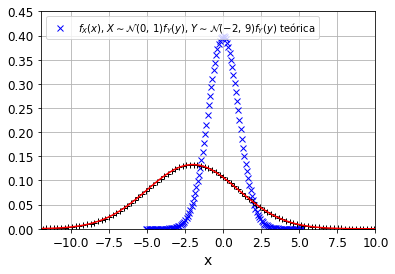

Saving figure codigo28


<Figure size 432x288 with 0 Axes>

In [10]:
from labcomdig import LCDfdp

Np = 1e7
Xg = np.random.randn(int(Np))
Y = 3*Xg-2
my = np.sum(Y)/Np # Podrí­amos haber utilizado la función mean de numpy
vary = np.sum((Y-my)**2)/Np # Podrí­amos haber utilizado la función var

plt.figure(7)
[fX,x] = LCDfdp(Xg)
plt.plot(x,fX,'xb')

[fY,y] = LCDfdp(Y)
plt.plot(y,fY,'+k')
plt.grid(True)
plt.axis([-12, 10, 0, 0.45])
#
y1 = np.arange(-12,12,0.2)
fy1 = (1/np.sqrt(2*np.pi*vary))*np.exp(-(y1-my)**2/(2*vary));
plt.plot(y1,fy1,'r')

plt.legend(['$f_X(x)$, $X \sim \mathcal{N}(0,\,1)$'\
        '$f_Y(y)$, $Y \sim \mathcal{N}(-2,\,9)$'\
        '$f_Y(y)$ teórica'], loc='upper left', facecolor='white')
plt.xlabel('x')
plt.show()
save_fig('codigo28')

### Teorema del valor esperado

**Código 2.9 Comprobación del Teorema del valor esperado**

In [11]:
Np = 10**6 # Número de muestras

# Generar una variable aleatoria  X  gaussiana N con media 0 y varianza 1. Encontrar su función densidad de probabilidad muestral.
X =np.random.randn(Np)
[fXi,xi] = LCDfdp(X,1024)

# Definir la variable aleatoria Y=g(X), con una función g(x) y encontrar sus muestras y su función densidad de probabilidad muestral.
Y = 3*(X-1)**2+4
[fYi,yi] = LCDfdp(Y,1024)

# Encontrar el valor esperado de acuerdo con las dos expresiones anteriores y comprobar que coinciden.

# Cálculo del valor esperado de Y mediante el teorema
my1 = np.dot(np.dot((xi[1]-xi[0]),((3*(xi-1)**2+4))),(fXi))
print('Media de Y calculada mediante el teorema : ' + str(my1))

# Cálculo directo del valor esperado de Y a partir de la estimación de la fdp
my2 = np.dot(np.dot((yi[1]-yi[0]),(yi)),(fYi))

print('Cálculo directo del valor esperado de Y : ' + str(my2))

Media de Y calculada mediante el teorema : 10.009027926857941
Cálculo directo del valor esperado de Y : 10.01161258449929


##  Transformación de dos variables aleatorias: suma de dos variables aleatorias continuas

Ver ejercios propuestos

## Variables aleatorias conjuntamente gaussianas

**Código 2.10** 

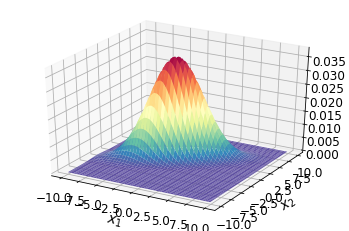

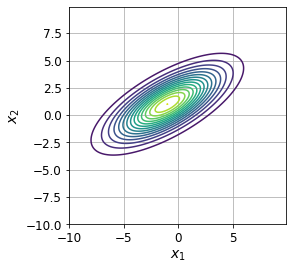

Saving figure 210


<Figure size 432x288 with 0 Axes>

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

m1 = -1      # Media de la primera gaussiana
s1 = 3      # Desviación de la primera gaussiana
m2 = 1       # Media de la segunda gaussiana
s2 = 2       # Desviación de la segunda gaussiana

r = 2**.5/2   # Coeficiente de correlación

# Parrilla de valores
[x1,x2] = np.meshgrid(np.arange(-10,10,0.1),np.arange(-10,10,0.1))

# el valor de la función
z  =(1/(2*np.pi*s1*s2*(1-r**2)**.5))*np.exp((-1/(2*(1-r**2)))*((x1-m1)**2/s1**2-(2*r/(s1*s2))*((x1-m1)*(x2-m2))+(x2-m2)**2/s2**2))

# Representación
fig = plt.figure(8)
ax = fig.gca(projection='3d')
ax.plot_surface(x1,x2,z, cmap=cm.Spectral_r)
plt.xlabel('$x_1$'),plt.ylabel('$x_2$')
plt.show()

plt.figure(9)
plt.contour(x1,x2,z,16),plt.xlabel('$x_1$'),plt.ylabel('$x_2$')
plt.axis('square')
plt.grid(True)
plt.show()
save_fig('210')

**Código 2.11**

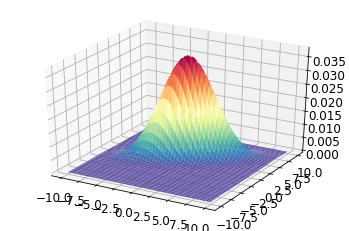

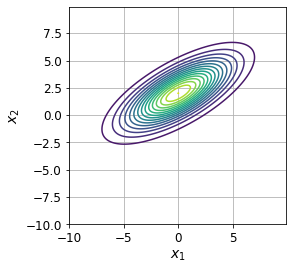

Saving figure 211


<Figure size 432x288 with 0 Axes>

In [13]:
from numpy import array, arange, exp, pi,sqrt, empty, meshgrid, dot
from numpy.linalg import det, inv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure, contour, grid, show
from matplotlib import cm

# Vector de valores esperados
m = array([[0],[2]])

# Matriz de covarianza
C = array([[9, 3*sqrt(2)],[3*sqrt(2), 4]])

x1 = arange(-10,10,.1)
x2 = arange(-10,10,.1)
z = empty([len(x2),len(x1)])

for k1 in range(len(x1)):
    for k2 in range(len(x2)):
        x=array([[x1[k1]],[x2[k2]]])-m
        # Observar la asignación de z, atendiendo a la ayuda de la función mesh
        z[k2,k1] = exp(-1/2*dot(dot(x.T,inv(C)),x))

z = 1/(2*pi*det(C)**(1/2))*z

fig = figure(10)
ax = fig.gca(projection='3d')
x1,x2 = meshgrid(x1,x2)
ax.plot_surface(x1,x2,z, cmap=cm.Spectral_r)
show()

figure(11)
contour(x1,x2,z,16),plt.axis('square')
plt.xlabel('$x_1$'),plt.ylabel('$x_2$'),plt.grid(True)
show()
save_fig('211')

### Generación de variables aleatorias conjuntamente gaussianas


**Código 2.12**

Saving figure codigo212


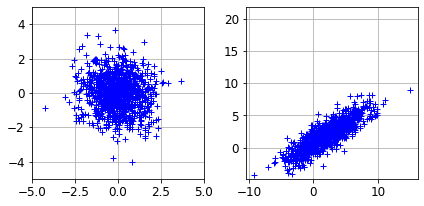

In [14]:
# Vector aleatorio conjuntamente gaussiano estadísticamente independiente
Np = 10**6
U = np.random.randn(2,Np)

# Representación del scattering plot del mismos
plt.figure(1)
plt.subplot(121)
plt.plot(U[0,:1000],U[1,:1000],'+b')
plt.axis('square')
plt.axis([-5,5 ,-5, 5])
plt.grid(True)

# Vector de valores esperados de las nuevas variables
m = np.array([[2],[2]])

# Matriz de covarianza deseada
C = np.array([[9, 5],[5, 4]])
#C = np.array([[9, 2*np.sqrt(2)],[2*np.sqrt(2), 4]])

# Obtención de la matriz A
[S,D,V]=np.linalg.svd(C)
A = S@np.diag(np.sqrt(D)) # A=np.dot(S,np.diag(np.sqrt(D))) 

# Obtención de las nuevas variables y representación del scattering plot de las mismas
X=np.dot(A,U)+m;
plt.subplot(122)
plt.plot(X[0,:1000],X[1,:1000],'+b')
plt.axis('square')
#plt.axis([-4,8,-4,8])
plt.grid(True)
save_fig('codigo212')